In [1]:

import numpy as np
from itertools import count
import random
from numba import njit
import der
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [ ]:

v_length = np.array([[30,10,31,11,32]]).T
v_compliance = np.array([[0,2,0,4,0]]).T
v_max_phi = np.array([[0,90,0,90,0]]).T

v_morphology_parameters = np.hstack((v_compliance,v_max_phi))
v_kinematic_parameters = v_length

u = 0

In [ ]:
@njit
def kinematics_builder(v_kinematic_parameters):
    n_points = len(v_kinematic_parameters)+1
    v_points0 = np.zeros((n_points,3))
    v_frames = np.zeros((n_points,9))
    for i in range(n_points):


In [ ]:
@njit
def nodes_from_morphology(v_morphology_parameters):
    n_nodes = len(v_morphology_parameters)
    node_params = np.zeros((n_nodes,2)) #phi/u s/u
    for i in range(n_nodes):
        node_params[i,:] = 



In [6]:
def setup():
    rect = patches.Rectangle((0.5,0.5),0.1,0.1,color = 'r')
    return rect



def update_rect(frame,viewport,rect):
    x,y = rect.get_xy()
    x+= -0.1+random.random()/5
    y+= -0.1+random.random()/5
    rect.set_xy((x,y))
    viewport.add_patch(rect)
    return rect,

    



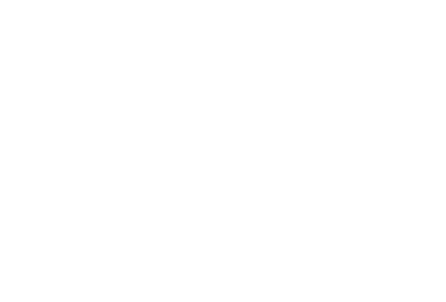

In [7]:
fig = plt.figure()
viewport = fig.add_axes([0,0,1,1],frameon=False,label ="viewport",facecolor = 'k')
viewport.xaxis.set_visible(False)
viewport.yaxis.set_visible(False)



rect = patches.Rectangle((0.5,0.5),0.1,0.1,color = 'r')



In [9]:
from functools import partial
tick = partial(update_rect,viewport= viewport,rect=rect)

ani = animation.FuncAnimation(fig,func=tick,interval=200,frames=100,blit=True)
ani.save('test.mp4')
from IPython.display import HTML
HTML(ani.to_jshtml())


In [ ]:

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc
from IPython.display import HTML


figure, axes = plt.subplots()

x = [1, 1, 2, 3, 3, 4, 4] 
y = [1, 2, 2, 2, 1, 1, 2]

line, = axes.plot(x, y, marker=None, color='r') 
point, = axes.plot(x[0], y[0], marker='o', color='r')

def update(num): 
    line.set_data(x[:num + 1], y[:num + 1]) 
    point.set_data(x[num], y[num]) 
    return (line, point)

anim = FuncAnimation(figure, update, len(x), interval=500, blit=True)

HTML(anim.to_html5_video())
